In [1]:
import os
os.chdir("/home/dat/Workspace/sd-maskrcnn")

import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.color
import tools.train
from autolab_core import YamlConfig
from mrcnn import model as modellib
from sd_maskrcnn.config import MaskConfig
from tools.evaluate import detect
from tools.resize import scale_to_square
%matplotlib inline

Unable to import DataStreamSyncer and Recorder! Likely due to missing multiprocess


Using TensorFlow backend.


In [2]:
config = YamlConfig("cfg/train.yaml")
config["dataset"]["images"] = "YYD_ims"
config["save_conf_name"] = "coco_finetune_YYD_00.yaml"

In [3]:
tools.train.train(config)


Configurations:
BACKBONE                       resnet35
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

/home/dat/.virtualenvs/sdmaskrcnn/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/dat/.virtualenvs/sdmaskrcnn/lib/python3.6/site-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/10
150/150 [==============================] - 325s 2s/step - loss: 1.5042 - rpn_class_loss: 0.0528 - rpn_bbox_loss: 0.3205 - mrcnn_class_loss: 0.3279 - mrcnn_bbox_loss: 0.3869 - mrcnn_mask_loss: 0.4160 - val_loss: 1.4111 - val_rpn_class_loss: 0.0352 - val_rpn_bbox_loss: 0.4907 - val_mrcnn_class_loss: 0.1707 - val_mrcnn_bbox_loss: 0.3657 - val_mrcnn_mask_loss: 0.3488
Epoch 2/10
150/150 [==============================] - 122s 810ms/step - loss: 1.0646 - rpn_class_loss: 0.0193 - rpn_bbox_loss: 0.2889 - mrcnn_class_loss: 0.1781 - mrcnn_bbox_loss: 0.2693 - mrcnn_mask_loss: 0.3090 - val_loss: 1.4198 - val_rpn_class_loss: 0.0390 - val_rpn_bbox_loss: 0.3575 - val_mrcnn_class_loss: 0.2999 - val_mrcnn_bbox_loss: 0.3523 - val_mrcnn_mask_loss: 0.3711
Epoch 3/10
150/150 [==============================] - 114s 762ms/step - loss: 0.7824 - rpn_class_loss: 0.0109 - rpn_bbox_loss: 0.1740 - mrcnn_class_loss: 0.1256 - mrcnn_bbox_loss: 0.1959 - mrcnn_mask_loss: 0.2759 - val_loss: 1.2213 - val_rpn_c

In [3]:
config = YamlConfig("cfg/benchmark.yaml")
config["model"]["path"] = "models/sdmaskrcnn_finetune_yyd20181219T1525/mask_rcnn_sdmaskrcnn_finetune_svd_0009.h5"

inference_config = MaskConfig(config["model"]["settings"])
inference_config.GPU_COUNT = 1
inference_config.IMAGES_PER_GPU = 1

model_dir, _ = os.path.split(config['model']['path'])
model = modellib.MaskRCNN(mode=config['model']['mode'], config=inference_config, model_dir=model_dir)
print("Loading weights from ", config['model']['path'])
model.load_weights(config['model']['path'], by_name=True)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


Loading weights from  models/sdmaskrcnn_finetune_yyd20181219T1525/mask_rcnn_sdmaskrcnn_finetune_svd_0009.h5
Re-starting from epoch 9


(512, 512)
{'rois': array([[244, 240, 338, 337],
       [317, 304, 426, 410],
       [ 96, 106, 291, 287],
       [106, 338, 247, 473],
       [211, 310, 313, 396],
       [241, 399, 387, 505],
       [108, 312, 193, 389],
       [352, 421, 376, 451],
       [170, 194, 225, 251],
       [148, 406, 258, 482],
       [249, 381, 324, 454]], dtype=int32), 'scores': array([0.99998724, 0.99997854, 0.99951303, 0.99903667, 0.9963779 ,
       0.99621946, 0.9898504 , 0.978381  , 0.9752652 , 0.95121163,
       0.81322384], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 11)


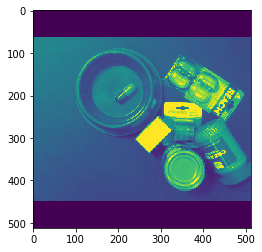

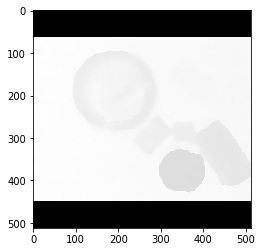

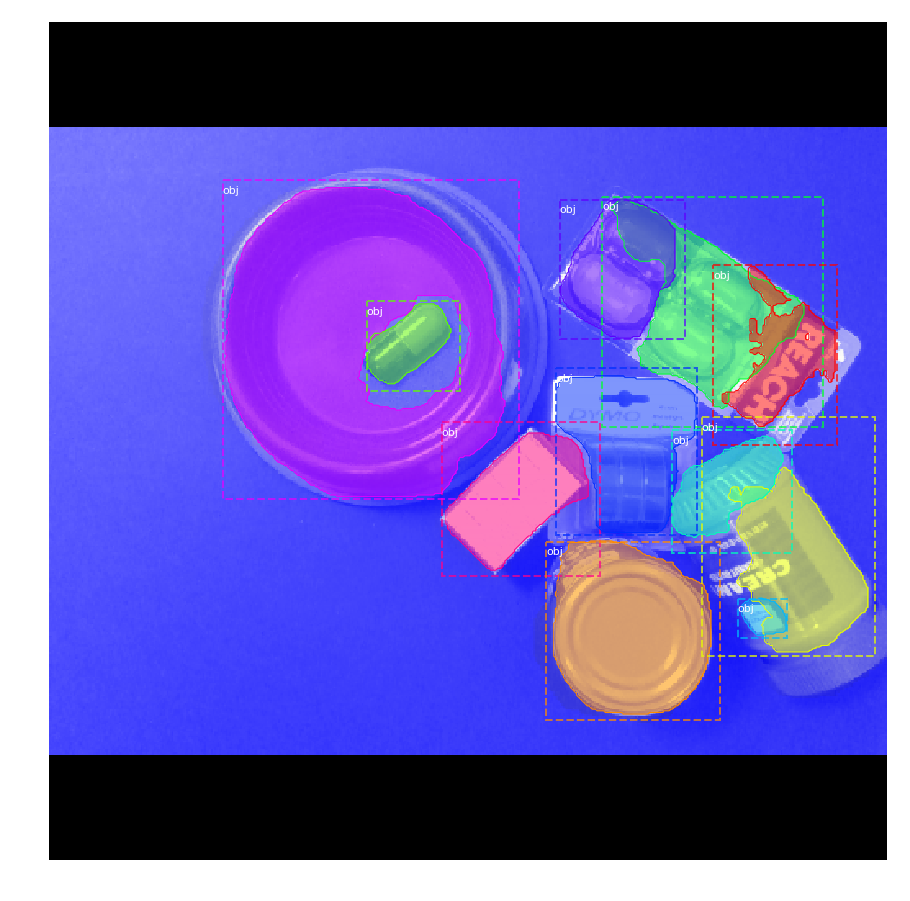

(512, 512)
{'rois': array([[342, 198, 438, 264],
       [123, 203, 209, 366],
       [324, 317, 439, 422],
       [178, 425, 242, 460],
       [165,  88, 219, 214],
       [237, 369, 319, 436],
       [227, 249, 325, 414],
       [276, 375, 306, 411],
       [250, 249, 326, 296],
       [333, 243, 434, 352],
       [278, 296, 325, 340],
       [207,  11, 234,  92]], dtype=int32), 'scores': array([0.99995863, 0.9998511 , 0.9995515 , 0.9962368 , 0.9958717 ,
       0.99303836, 0.9904474 , 0.9583092 , 0.8838188 , 0.8804484 ,
       0.8399932 , 0.73928183], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 12)


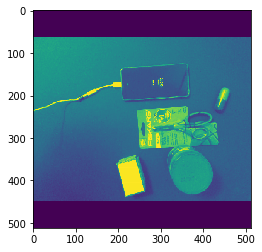

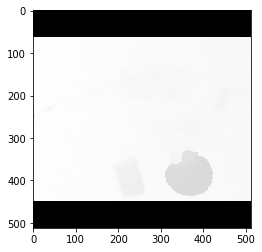

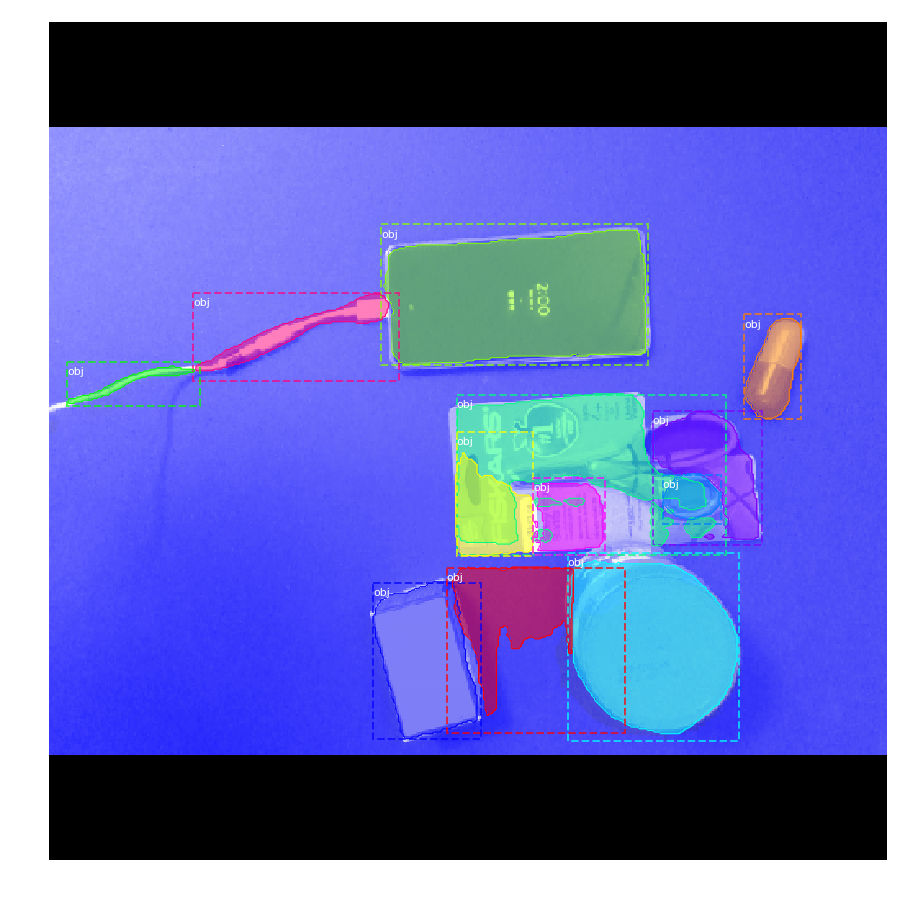

(512, 512)
{'rois': array([[238, 130, 297, 252],
       [324, 243, 421, 381],
       [197, 325, 343, 512],
       [162, 322, 225, 385],
       [345, 278, 405, 332],
       [224, 445, 293, 505],
       [137, 386, 231, 453],
       [143, 155, 220, 337],
       [152, 180, 291, 445],
       [133, 285, 181, 418],
       [146, 171, 166, 258]], dtype=int32), 'scores': array([0.9998869 , 0.99861205, 0.9974341 , 0.996391  , 0.9774301 ,
       0.9460921 , 0.9101996 , 0.88004756, 0.87336326, 0.78847444,
       0.77734065], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 11)


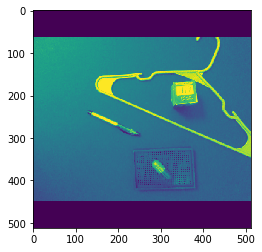

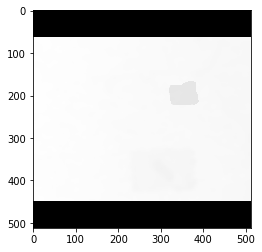

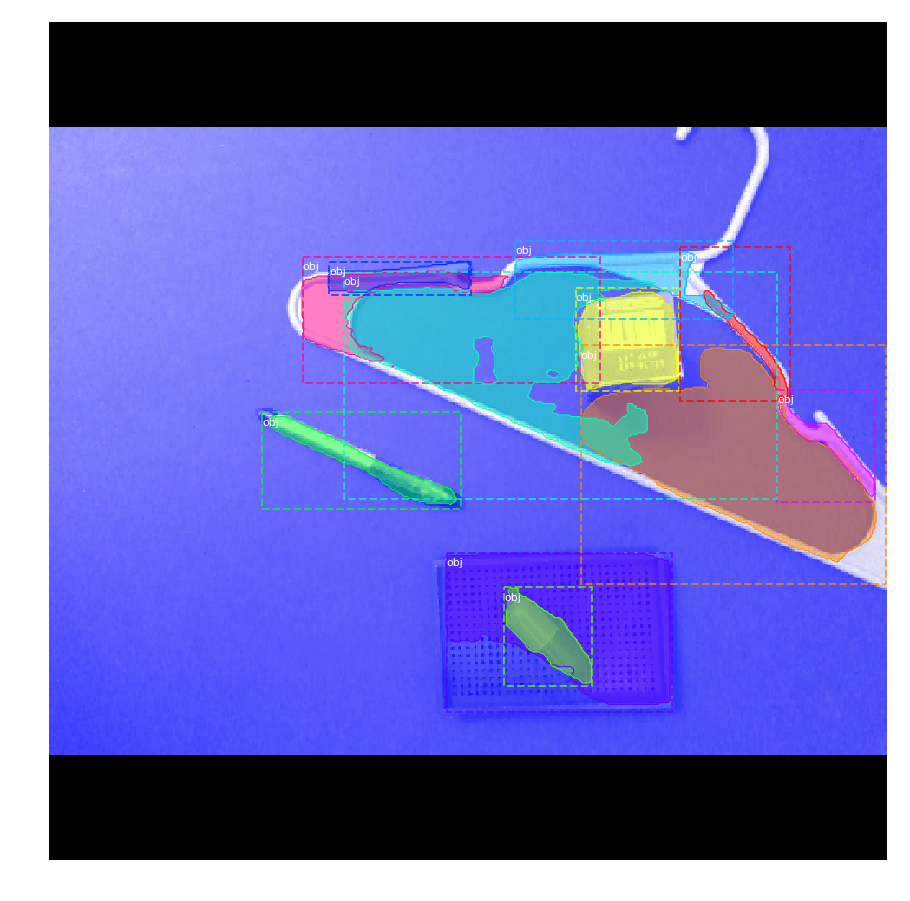

(512, 512)
{'rois': array([[152, 205, 259, 295],
       [181, 407, 240, 467],
       [265, 142, 375, 271],
       [152, 292, 360, 418],
       [256, 332, 377, 434],
       [330, 382, 364, 419]], dtype=int32), 'scores': array([0.99993134, 0.9999075 , 0.9996001 , 0.9905156 , 0.9678804 ,
       0.8920974 ], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 6)


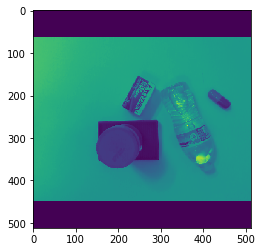

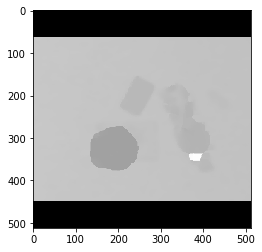

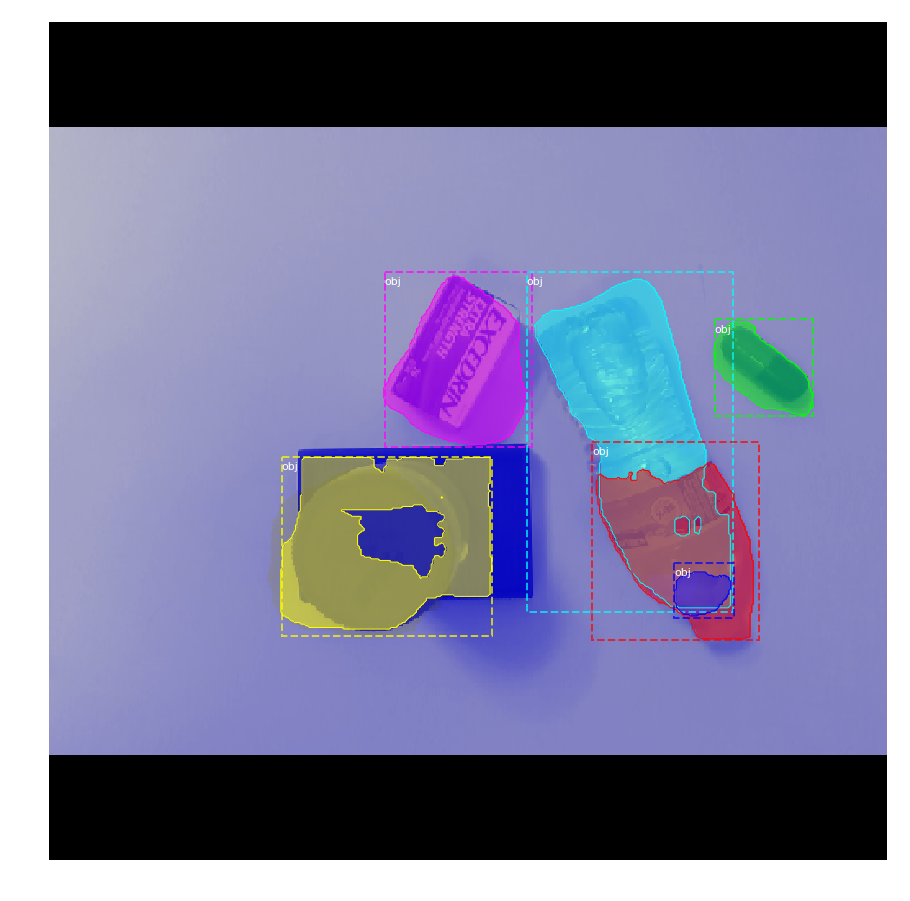

(512, 512)
{'rois': array([[172, 273, 264, 357],
       [205, 402, 390, 494],
       [266, 256, 378, 374],
       [193, 161, 327, 316],
       [203, 418, 257, 495],
       [266, 199, 329, 258],
       [257, 195, 292, 225]], dtype=int32), 'scores': array([0.99988365, 0.9998272 , 0.9996289 , 0.9995546 , 0.99363685,
       0.975637  , 0.9507033 ], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 7)


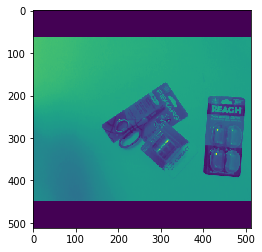

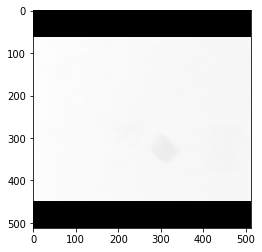

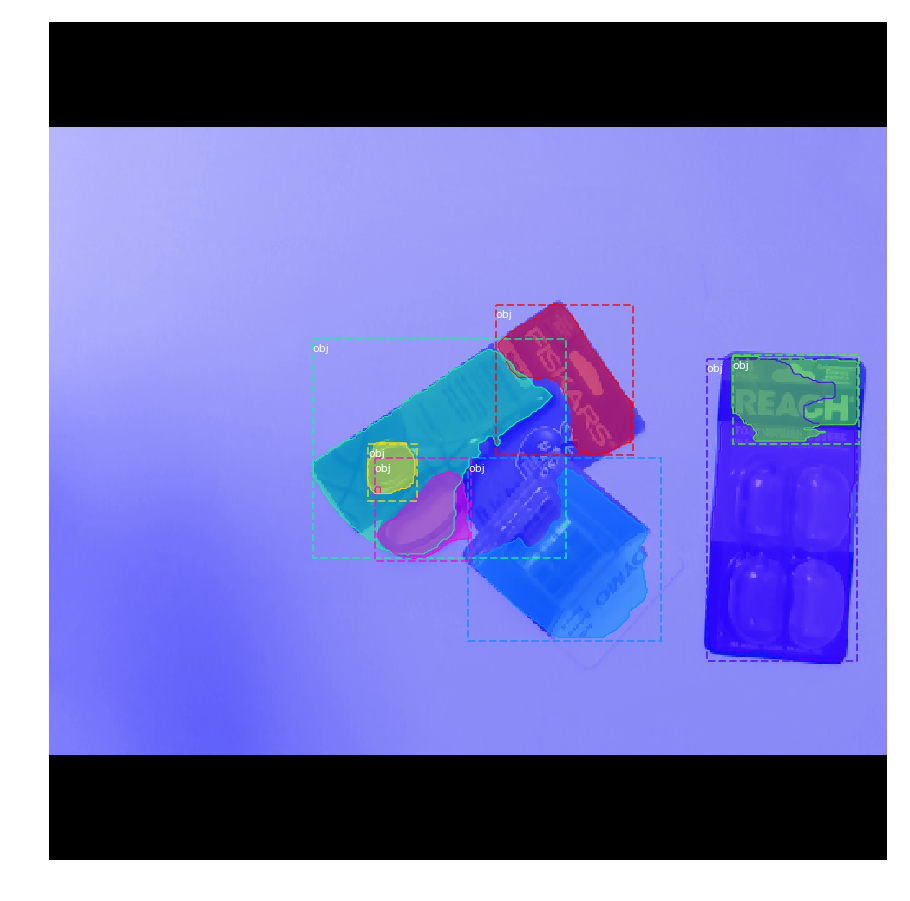

(512, 512)
{'rois': array([[167, 427, 247, 498],
       [174, 233, 381, 434],
       [188, 281, 294, 334],
       [193, 217, 367, 322],
       [166, 267, 252, 316],
       [170, 218, 295, 280],
       [164, 269, 237, 403]], dtype=int32), 'scores': array([0.99977547, 0.9994875 , 0.98693025, 0.94982433, 0.8879856 ,
       0.8034333 , 0.7402825 ], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 7)


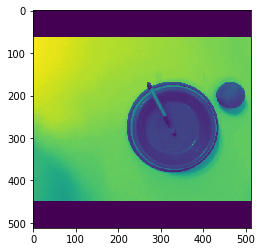

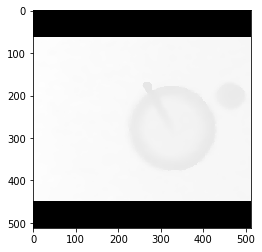

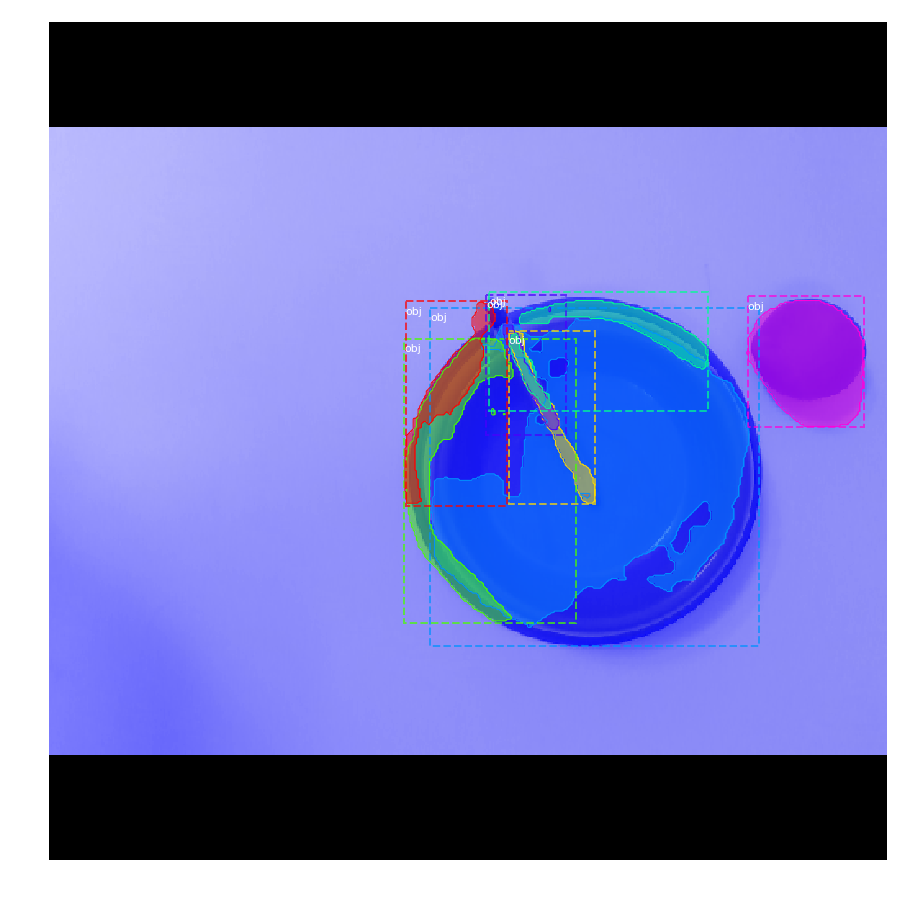

(512, 512)
{'rois': array([[247, 266, 298, 353],
       [ 80, 276, 179, 333],
       [231,  93, 317, 194],
       [161, 156, 263, 331],
       [230, 414, 285, 502],
       [249, 123, 320, 379]], dtype=int32), 'scores': array([0.99911517, 0.9962519 , 0.99566746, 0.83080035, 0.7580179 ,
       0.70511085], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 6)


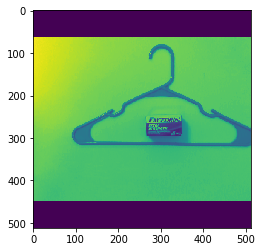

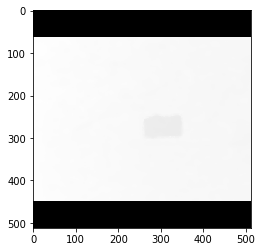

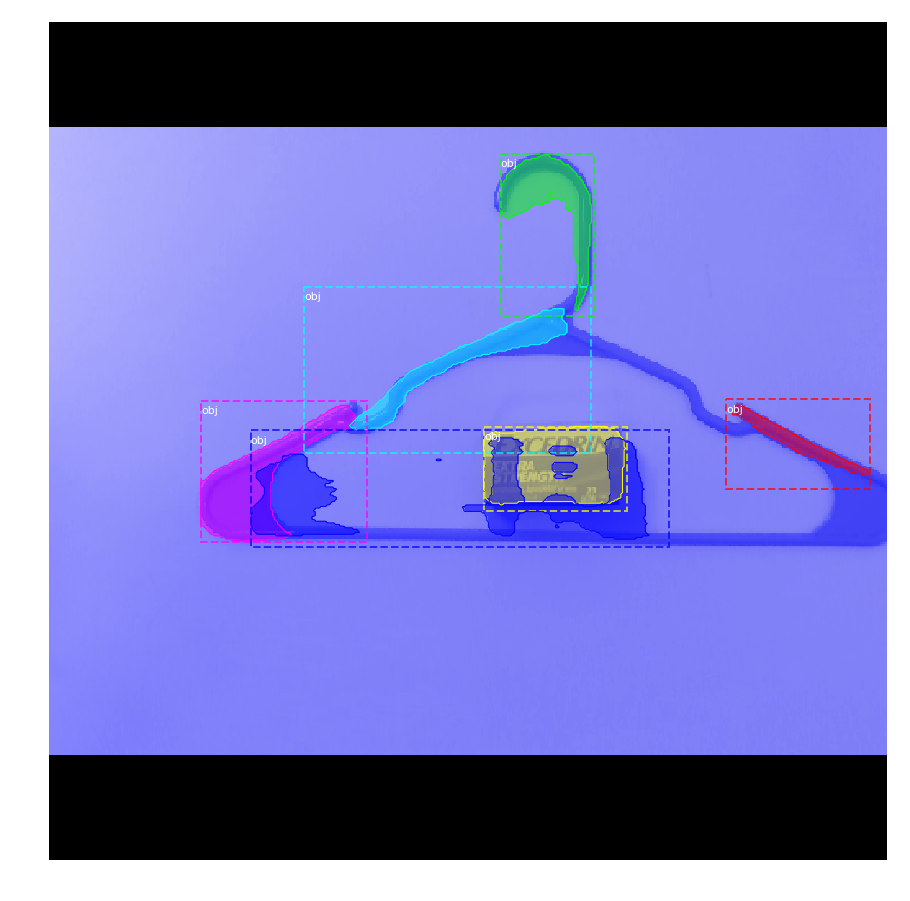

(512, 512)
{'rois': array([[291, 229, 363, 360],
       [259, 386, 339, 477],
       [155, 263, 264, 371]], dtype=int32), 'scores': array([0.9999267 , 0.99988806, 0.9998553 ], dtype=float32), 'class_ids': array([1, 1, 1], dtype=int32)}
(512, 512, 3)


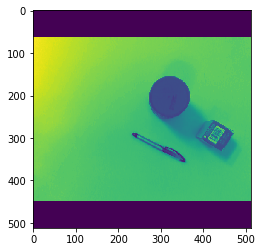

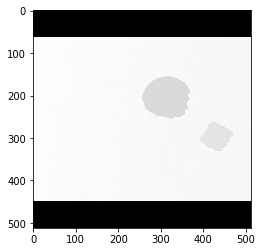

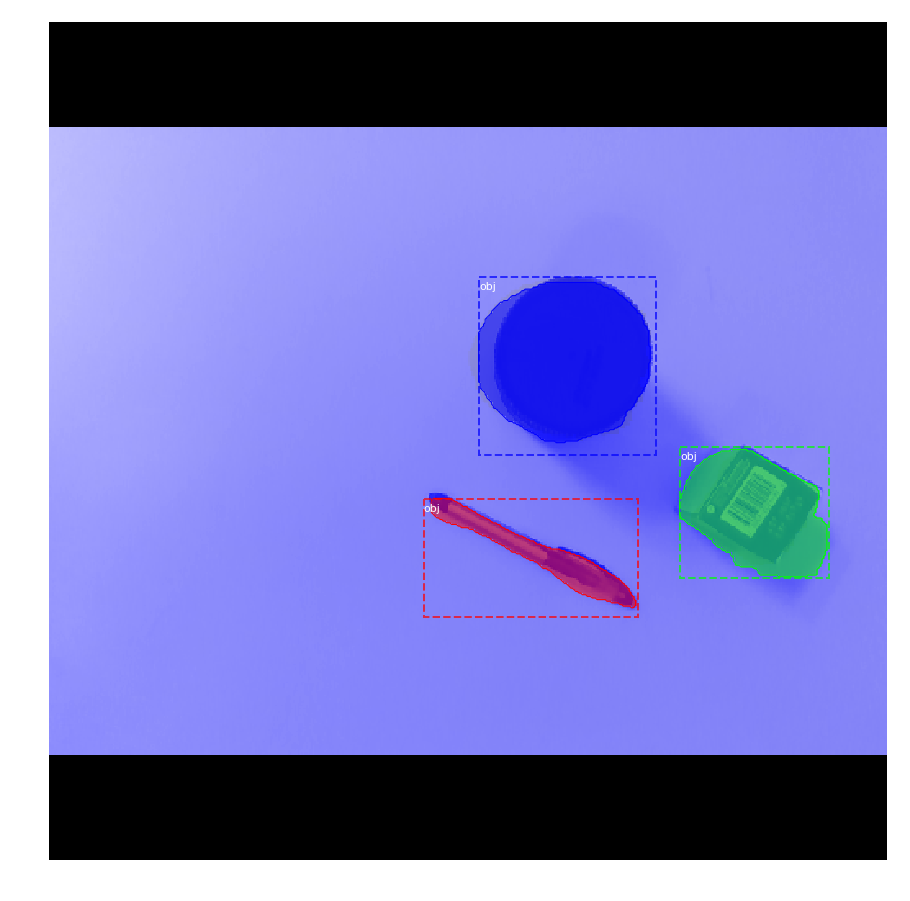

In [8]:
COLOR_DIR = "data/color"
DEPTH_DIR = "data/depth"

for fname in sorted(os.listdir(COLOR_DIR)):
    color = scale_to_square(cv2.imread(os.path.join(COLOR_DIR, fname)))[..., ::-1]
    depth = scale_to_square(cv2.imread(os.path.join(DEPTH_DIR, fname)))
    v_pad, h_pad = (512 - color.shape[0]) // 2, (512 - color.shape[1]) // 2
    color = cv2.copyMakeBorder(color, v_pad, v_pad, h_pad, h_pad, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    depth = cv2.copyMakeBorder(depth, v_pad, v_pad, h_pad, h_pad, cv2.BORDER_CONSTANT, value=0)
    gray = (skimage.color.rgb2gray(color) * 255).astype(np.uint8)
    
    plt.figure()
    plt.imshow(gray)
    plt.figure()
    plt.imshow(depth)
    
    inp_img = np.zeros(depth.shape)
    inp_img[..., 0] = gray
    inp_img[..., 1] = gray
    inp_img[..., 2] = depth[..., 0]
    detect(model, inp_img)